# <h1><center>1. Insurance Charges Prediction Project</center></h1>

>## 1.1 Problem Statement
- The objective is to predict individual's insurance premium based on allocated features that are taken into consideration for underwriting purposes; we also want to (along the way) identify premium holders who pose a risk of making making claims agains their premiums in the near future. 

>> ### 1.1.1 Project Goal
- To predict insrance charges based on given features. 

>> ### 1.1.2 Possible Questions
- What features affect insurance pricing
- Does Data Visualization offer better insights into the data?
- What hidden patterns can we reveal from the dataset?
- Data segnmentation Analysis: Which group seems to be charged more? $e.t.c.$

>## 1.2 About The Dataset
This data was scrped from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance).
While we will dive deeper into the features involved in our data, below are a list and definitions of them:
- **Charges**: Total medical expense charged to the plan for the calendar year
- **Age**: Insurance policyholder’s age, ranging from 18 to 64
- **Sex**: Insurance policyholder’s gender identity- male or female
- **BMI**: The Body Mass Index, used to vary premim costs
- **Children**: Number of dependants/children on parents' insurance plan
- **Smoker**: Smoking status of an insurance policyholder
- **Region**: The beneficiary’s regional residential area within the US:Northeast, Southeast, Northwest, Southwest


> ## 1.3 Methodology
- **Step 1- Data collection:** This will involve scapping of structured datafrom Kaggle.
- **Step 2- Data Preprocessing:** In this phase, the data is prepared for the analysis purpose which contains relevant information. Pre-processing and cleaning of data are one of the most important tasks that must be one before dataset can be used for machine learning. The real-world data is noisy, incomplete and inconsistent. So, it is required to be cleaned.
- **Step 3- Extraction of Feature Set/Training Data:** Feature set or training data can be prepared from the cleaned data by using any of the available
techniques. The feature sets and training set that has obtained by using any method will be used for the implementation of machine learning algorithms.
- **Step 4- Implementation of Machine Learning Algorithm on Feature Set/Training Data:** 
- **Step 5: Testing of Data:** Testing of data is done based on training model which is classified using supervised learning algorithm.

> ## 1.4 Experimental Design
- We will use static data- dataset already available rather than real-time data from an IoT system.
Links to the Datasets
- [Kaggle](https://www.kaggle.com/mirichoi0218/insurance)
- [Enigma](https://public.enigma.com/?gclid=EAIaIQobChMIyf35qdXm2gIV0AQqCh19iQYuEAMYASAAEgJduvD_BwE)

> ## 1.5 Software tools & Hardware Requirements: 
- Jupyter Notebook, 
- Python3 Liraries such as [NumPy](https://numpy.org/doc/stable/user/quickstart.html), [Pandas](https://pandas.pydata.org/docs/), [Matplotlib](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) and [Seaborn](https://seaborn.pydata.org/) 
- Supervised Learning libraries such [Scikit-Learn](https://scikit-learn.org/stable/)
  ... will be exploited for the development and experimentation of the project. 

# <center>2. Data Collection</center>
The first step in the Machine Learning process is getting data.
- We will use data from the ever-famous internet respository site, [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). 
> ## 2.1 Import Neccessary Libraries

In [199]:
# Importing essential starter libraries
import numpy as np      # vectors and matrices || Linear Algebra
import pandas as pd     # tables and data manipulations 

# For Dates
import datetime
from dateutil.relativedelta import relativedelta    # working with dates with style
from scipy.optimize import minimize                 # for function minimization

# Sklearn imports
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression # For this particular model
from sklearn.externals import joblib # For this particular model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# statistics and econometrics
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.seasonal import seasonal_decompose

# Visualization Libraries
import matplotlib.pyplot as plt # plots
import seaborn as sns # more plots
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

# Visualization with Plotly
import chart_studio.plotly as ply # more fancy plots
import cufflinks as cf
from chart_studio.plotly import plot_mpl
import plotly.express as px

# some useful functions
from itertools import product
from tqdm import tqdm_notebook
import warnings # `do not disturb` mode
warnings.filterwarnings('ignore')

# To have graphs embedded in the notebook
%matplotlib inline

# Print the graphs as PDF and PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

> ## 2.2 Data Ingestion

In [76]:
# Load the dataset as a dataframe
claims = pd.read_csv('Insurance_claims.csv')

---
---
# <center>3. Data Preprocessing & Exploratory Data Analysis</center>
**What is it?**

- According to [Techopedia](https://www.techopedia.com/definition/14650/data-preprocessing), **Data Preprocessing** is a Data Mining technique that involves transforming raw data into an understandable format.

**Why Do We Need Data Preprocessing?**
- Since real-world data tends to be incomplete, noisy or inconsistent, we need this process in order to eliminate such to avoid poor quality models we'll build later. 
- Data Preprocessing provides operations which can organise the data into a proper form for better understanding in data mining process.

**Stages of Data Preprocessing**
Data preprocessing is divided into four stages: 
    1. Data cleaning, 
    2. Data integration, 
    3. Data reduction, and 
    4. Data transformation.
    
> ## 3.1 Data Cleaning & Inspection
**What is Data Cleaning?**

In Data Science, data cleaning can be described in many ways, one of them being: <font color=red>***the process of fixing and/or removing incorrect, corrupted, wrongly-formatted, incomplete or duplicate data within a dataset***.</font>

Quite mouthful and yet comprehensive. We want to ensure that our dataset has no duplicate data or does not contain any corrupted entries that will otherwise lead to wrong/less useful models. 

As we make use of multiple data sources in data analysis, the chances of duplicating data are very high, and so are those of mislabeling the data. It goes without saying that incorrect data leads to unreliable algorithms and predictions or outcomes. While there are no sure steps of going about data cleaning due to the nature of different datasets, it is however vital to build some sort of a framework or template for data cleaning process for future references so as to at least be close to doing it right each time.

>> ### 3.1.1 Exploring the Dataset: **Understanding the data**
 With the data fed into our notebook, it's time we take a look at it: we need to spend some time exploring it in order to understand what the features represent in each column. We want to avoid or at least minimize mistakes in the data analysis and the modeling process. 
Without any further ado, let's dive right into our loaded dataset.


In [5]:
# Check the first 5 entries
claims.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


>> ### 3.1.2 Size of the dataset: How many entries are in our dataset?

In [6]:
# Check the number of rows and columns
print("There are ", claims.shape[0], "rows and", claims.shape[1], "features.")

There are  1338 rows and 7 features.


### $Observation$
- We have $1338$ entries (rows) and $7$ features (columns). This is not a big dataset.

>> ### 3.1.3 Missing Data: 
- **Do we have missing data under each feature?**


In [7]:
# Check if there's missing data
# Turn it into a dataframe
pd.DataFrame(claims.isnull().sum(), columns=["Number of Missing Values"]).T

,age,sex,bmi,children,smoker,region,charges
Number of Missing Values,0,0,0,0,0,0,0


### $Observation$
- It looks like our dataset has no missing values.

>> ### 3.1.4 Statistical Description of the dataset
- **Looking at only Numerical Columns, what are some basic statistical observations?**


In [8]:
# Describe the statistical elements of the dataset
claims.describe().T#.T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### $Observation$

The above returns important statistical summaries for our dataset.
- **Age**: Average age of our policyholders is 39, the youngest being $18$ and the olders aged $64$.
- **BMI:** Average BMI is $30.7$; $25$% of our policyholders had a BMI of $34.7$.
- **Children:** Most policyholders had on average 1 child on thier policies, with only $25$% having 2 children, and $75$% with no children.

>> ### 3.1.5 Data Types 
* **What Data Types Do we have in the dataset?**

In [9]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


> ## 3.2 Exploratory Data Analysis
Exploratory Data Analysis (EDA) is the philosophy of analyzing datasets to to summerize their main characteristics, usually employing graphs and data vizualization techniques[ [1] ](https://en.wikipedia.org/wiki/Exploratory_data_analysis).

>This is the critical first step in analyzing the data; here are some reasons for using EDA:
  * Detection of mistakes
  * Determining relationships among the features
  * Assessing assumptions on which statistical inference will be based, etc. 
  
>It is worth noting that EDA is not really a formal process with rigid set of rules or path to follow, it is waht one makes it. The aim is to uncover whatever may be hidden in the data, so one should feel free to investigate whatever idea that comes to mind. Of course some ideas will yield some positive outcomes, others not so much. To successfully perform data cleaning, we'll need to deploy EDA tools such as visualisation, transformation and modelling. 

>> ### 3.2.1 Multivariate Analysis:
- Let us dig deeper to see how feature affects charges
>> ### a) Age, BMI $vs.$ Charges
- #### Do Charges increase with Age?

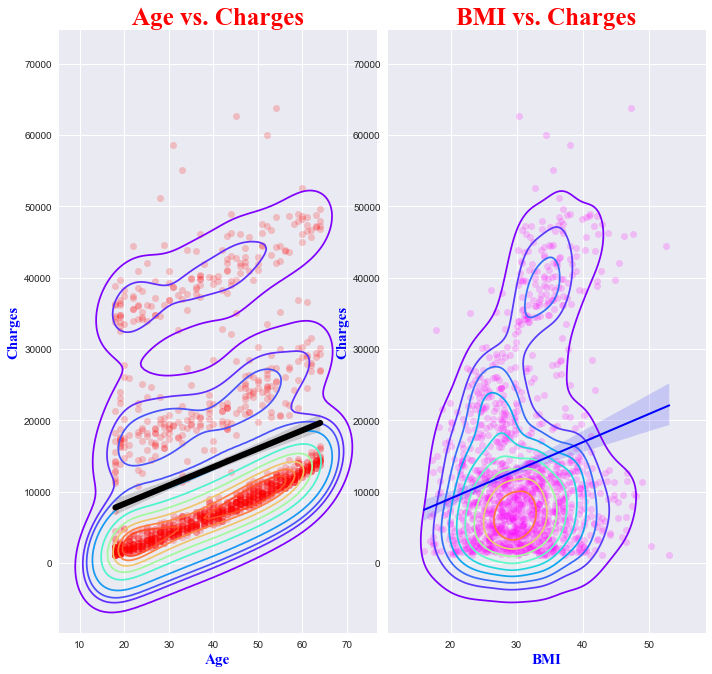

In [10]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 18))
plt.subplot(2,2,1)
# AGE Regression Plot
sns.regplot(x='age', y='charges', data=claims, 
            scatter_kws = {'color': 'red', 'alpha':0.2}, 
            line_kws = {'color': 'black', 'alpha':1, 'lw':6})
sns.kdeplot( claims['age'], claims['charges'], cmap="rainbow")
plt.title("Age vs. Charges", fontname ='Times New Roman', size = 25, color ='red')
plt.xlabel("Age", fontname ='Times New Roman', size = 15, color ='blue')
plt.ylabel("Charges", fontname ='Times New Roman', size = 15, color ='blue')
plt.tight_layout()
plt.subplot(2,2,2)
# BMI Regression Plot
sns.regplot(x='bmi', y='charges', data=claims, 
            scatter_kws = {'color': 'magenta', 'alpha':0.2}, 
            line_kws = {'color': 'blue', 'alpha':1, 'lw':2})
sns.kdeplot( claims['bmi'], claims['charges'], cmap="rainbow")
plt.title("BMI vs. Charges", fontname ='Times New Roman', size = 25, color ='red')
plt.xlabel("BMI", fontname ='Times New Roman', size = 15, color ='blue')
plt.ylabel("Charges", fontname ='Times New Roman', size = 15, color ='blue')
sns.set_style('whitegrid')
plt.show()

### $Analysis$
- We can see the upward trend in the $Age$ $vs.$ $Charges$: The older the policyholder, the more the charges.

- We also see the upward trend in the $BMI$ $vs.$ $Charges$: The higher the policyholder's BMI, the more the charges.

>> ### a) Age, BMI $vs.$ Charges with respect to Smoking
- #### Do smokers get charged more?

Text(0, 0.5, 'Charges')

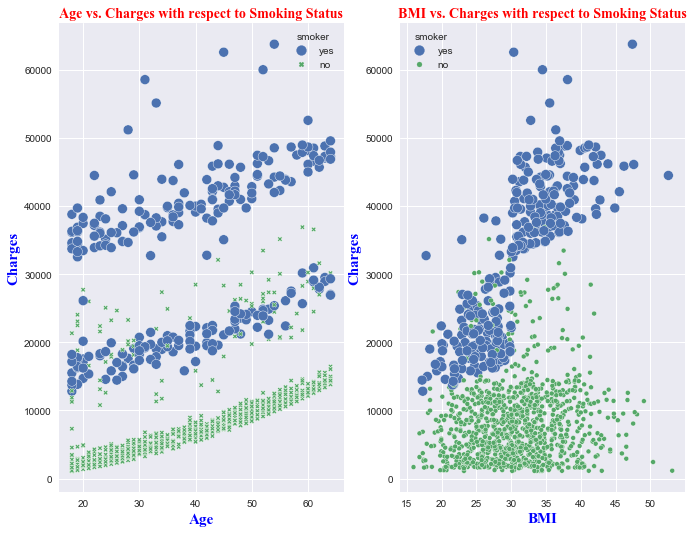

In [11]:
plt.figure(figsize=(10, 19))
plt.style.use('seaborn')
plt.tight_layout()
# Age Plot
plt.subplot(2,2,1)
sns.scatterplot(x='age', y='charges', hue=claims['smoker'], size=claims['smoker'], style = claims['smoker'], data=claims)
plt.title("Age vs. Charges with respect to Smoking Status", fontname ='Times New Roman', size = 14, color ='red')
plt.xlabel("Age", fontname ='Times New Roman', size = 15, color ='blue')
plt.ylabel("Charges", fontname ='Times New Roman', size = 15, color ='blue')

# BMI Plot
plt.subplot(2,2,2)
sns.scatterplot(x='bmi', y='charges', hue=claims['smoker'], size=claims['smoker'], data=claims)
plt.title("BMI vs. Charges with respect to Smoking Status", fontname ='Times New Roman', size = 14, color ='red')
plt.xlabel("BMI", fontname ='Times New Roman', size = 15, color ='blue')
plt.ylabel("Charges", fontname ='Times New Roman', size = 15, color ='blue')

### $Analysis$
- Indeed, smokers do get charged more as we can see from our charts above.
- The older one is, $AND$ a smoker, the higher the charges, and the higher the BMI one has, $AND$ is a smoker, the higher the charges.
- It all makes sense, smokers pose the highest risk, now on top of that, the age and BMI play a role- adding more risk if older or heavier.

>> ### b) Categorical Features Analysis
>> - #### Categorical Features vs Charges

Text(0.5, 0, 'Region')

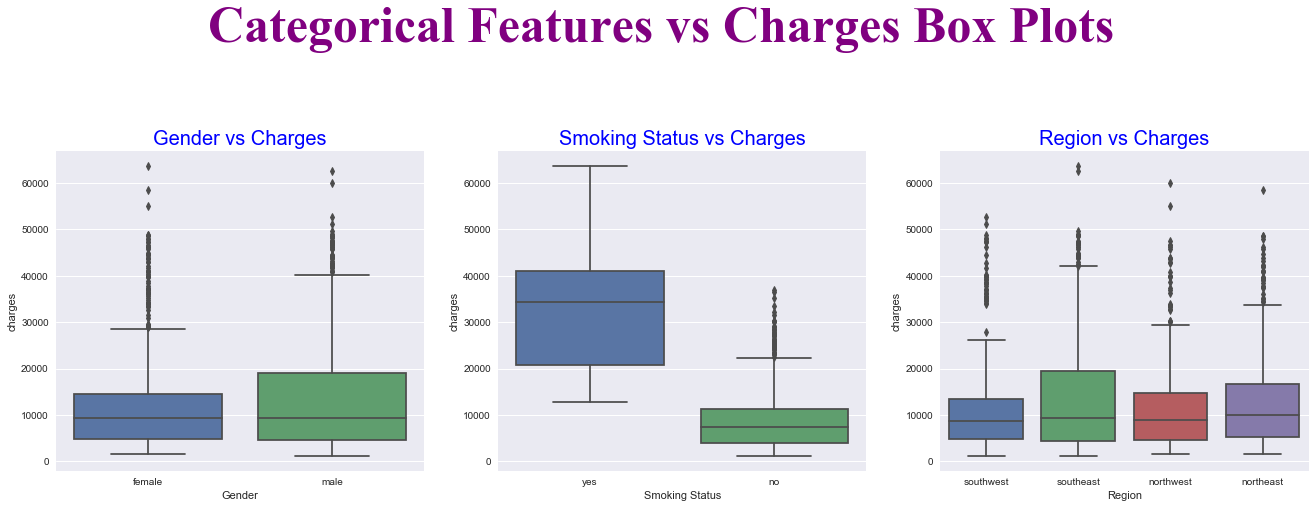

In [12]:
plt.figure(figsize=(20, 20))
plt.tight_layout()
plt.suptitle("Categorical Features vs Charges Box Plots", fontname ='Times New Roman', size = 50, color ='purple')
# Gender Boxplots
plt.subplot(3, 3, 1)
sns.boxplot(x = 'sex', y = 'charges', data = claims)
plt.title("Gender vs Charges", size = 20, color ='blue')
plt.xlabel("Gender")

# Smoking Status
plt.subplot(3,3,2)
sns.boxplot(x = 'smoker', y = 'charges', data = claims)
plt.title("Smoking Status vs Charges", size = 20, color ='blue')
plt.xlabel("Smoking Status")

# Region
plt.subplot(3,3,3)
sns.boxplot(x = 'region', y = 'charges', data = claims)
plt.title("Region vs Charges", size = 20, color ='blue')
plt.xlabel("Region")

#### $Analysis$
   1. - <font color='red'>$\implies$</font> **Gender**: Charges seem to not rise based on gender. 
   2. -  <font color='red'>$\implies$</font>**Sming Status**: Smoking does have an impact on charges.
   3. -  <font color='red'>$\implies$</font>**Region**: Region does not seem to affect charges.

>> ### c) Gender Distribution
- #### How many males and females in the dataset?

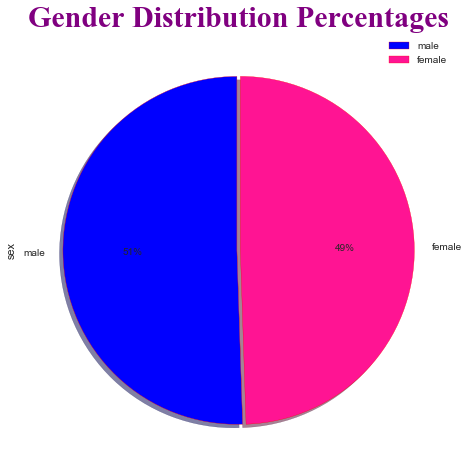

,male,female
sex,676,662


In [13]:
gender = pd.DataFrame(claims['sex'].value_counts())

# visualize fule type
#sex = pd.DataFrame(claims['sex'].value_counts()).reset_index()
plt.style.use('seaborn')
explode = (0.01, 0.01)
varient_colors = ['blue', 'deeppink']
gender.plot.pie(y='sex', figsize=(8,8), autopct='%1.0f%%', explode=explode, startangle=90, shadow=True, 
                wedgeprops={'edgecolor': 'red'},  colors = varient_colors)
plt.title("Gender Distribution Percentages", fontname ='Times New Roman', size = 30, color ='purple')
plt.show()
gender.T

### $Analysis$
- The number of males is almost equalto the number of available females: 51% to 49% respectively.

>> ### d) Smoking Status Distribution
- #### How many policy holders smoke in the dataset?

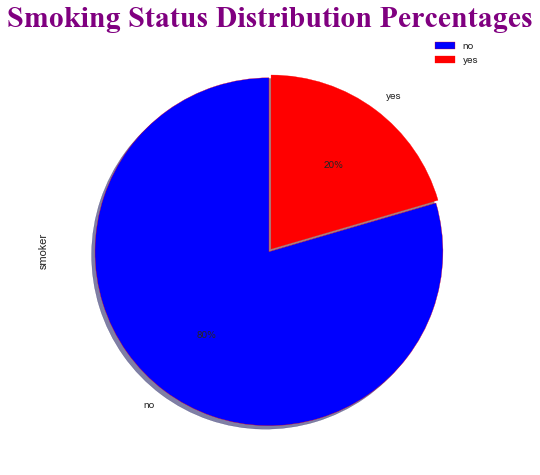

,no,yes
smoker,1064,274


In [14]:
smoker = pd.DataFrame(claims['smoker'].value_counts())

explode = (0.01, 0.01)
varient_colors = ['blue', 'red']
smoker.plot.pie(y='smoker', figsize=(8,8), colors = varient_colors, autopct='%1.0f%%', explode=explode, startangle=90, shadow=True, wedgeprops={'edgecolor': 'red'})
plt.title("Smoking Status Distribution Percentages", fontname ='Times New Roman', size = 30, color ='purple')
plt.show()
smoker.T

### $Analysis$
- <font color='red'>$\implies$</font>Most (80%) of the policyholders do not smoke.

>> ### e) Dependents Distribution

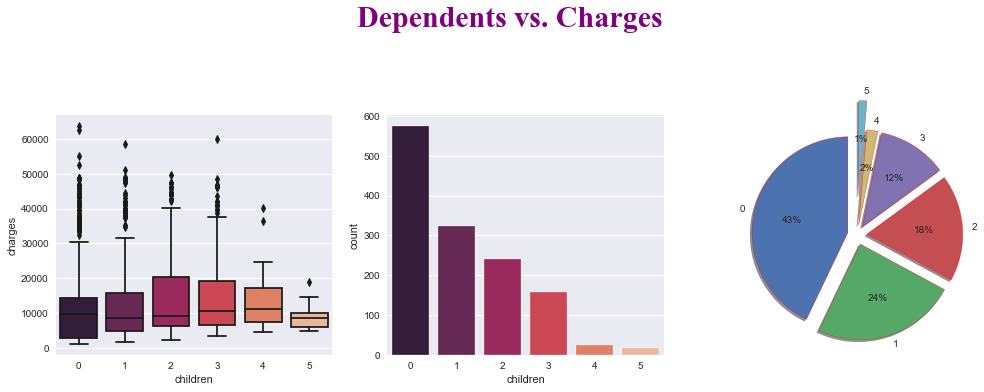

,0,1,2,3,4,5
children,574,324,240,157,25,18


In [15]:
child = pd.DataFrame(claims['children'].value_counts())
##########################################################################################
# Set figure size
plt.style.use('seaborn')
plt.figure(figsize=(15,15))
plt.tight_layout()

# Set Plot Title for both subplots
plt.suptitle("Dependents vs. Charges", fontname ='Times New Roman', size = 30, color ='purple')

# box Plots
plt.subplot(3,3,1)
sns.boxplot(x = 'children', y = 'charges', data = claims, palette=('rocket'))

# Count /Bar Plots
plt.subplot(3,3,2)
sns.countplot(claims.children, palette=("rocket"))

# Pie Chart
plt.subplot(3,3,3)
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.4)
labels=["0", "1", "2", "3", "4", "5"]
pie = plt.pie(claims.children.value_counts(),
              labels=labels,
              autopct='%1.0f%%', 
              explode=explode,
              #palette = ('rocket'),
              startangle=90, shadow=True, 
              wedgeprops={'edgecolor': 'red'})
plt.show()
child.T

### $Analysis$
- We see that most policyholders did not have dependents (children)

>> ### f) Bivariate Pairplots

<Figure size 1080x1440 with 0 Axes>

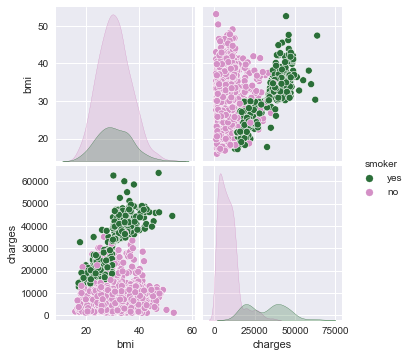

In [16]:
plt.figure(figsize=(15,20))
plt.style.use('seaborn')
sns.pairplot(claims[['bmi', 'charges', 'sex', 'smoker']], hue="smoker", 
             hue_order=None, palette = 'cubehelix');

>> ### 3.2.2 Univariate Analysis: 
>>> #### 3.2.2.1 Focusing on Charges
Let's put our focus only on the `charges` column, so we have a general idea of how much people paid in premiums, taking into account statistics like min, max prices, std dev, quatiles and so on. 

In [17]:
df = claims
# Minimum price of the data
minimum_price = np.min(df["charges"])
# Alternative using pandas
# minimum_price = prices.min()

# Maximum price of the data
maximum_price = np.max(df["charges"])
# Alternative using pandas
# maximum_price = prices.max()

# Mean price of the data
mean_price = np.mean(df["charges"])
# Alternative using pandas
# mean_price = prices.mean()

# Median price of the data
median_price = np.median(df["charges"])
# Alternative using pandas
# median_price = prices.median()

# Standard deviation of prices of the data
std_price = np.std(df["charges"])
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(df["charges"], 25)
third_quartile = np.percentile(df["charges"], 75)
inter_quartile = third_quartile - first_quartile

# We show the calculated statistics
print("\tStatistics for charges:")
print('-'*42)
print("Minimum charges:                ${:,.2f}".format(minimum_price))
print("Maximum charges:                ${:,.2f}".format(maximum_price))
print("Average charges:                ${:,.2f}".format(mean_price))
print("Median charge:                  ${:,.2f}".format(median_price))
print("Standard deviation of charges:  ${:,.2f}".format(std_price))
print("First quartile of charges:      ${:,.2f}".format(first_quartile))
print("Second quartile of charges:     ${:,.2f}".format(third_quartile))
print("Interquartile (IQR) of charges: ${:,.2f}".format(inter_quartile))
print('-'*42)

	Statistics for charges:
------------------------------------------
Minimum charges:                $1,121.87
Maximum charges:                $63,770.43
Average charges:                $13,270.42
Median charge:                  $9,382.03
Standard deviation of charges:  $12,105.48
First quartile of charges:      $4,740.29
Second quartile of charges:     $16,639.91
Interquartile (IQR) of charges: $11,899.63
------------------------------------------


>>> #### 3.2.2.2 Outlier Analysis in Charges
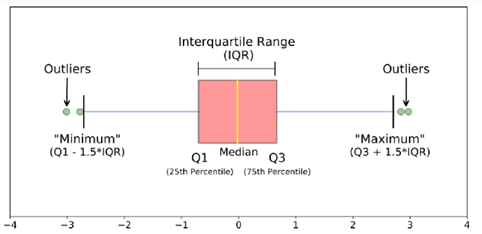

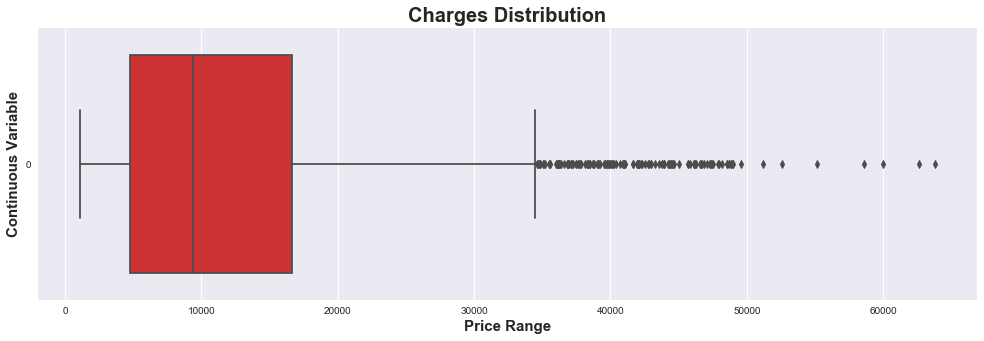

In [18]:
# Outlier Analysis
plt.figure(figsize = [15,5])
sns.boxplot(data=claims['charges'], orient="h", palette="Set1", color="red")
plt.title("Charges Distribution", fontsize = 20, fontweight = 'bold')
plt.xlabel("Price Range", fontsize = 15, fontweight= 'bold')
plt.ylabel("Continuous Variable", fontsize = 15, fontweight= 'bold')
plt.show()

### $Observation$
- We can see that we do have outliers in this dataset, and we need to handle them.
### Handling Outliers
- We will use **IQR (Interquartile Range Method)** to deal with outliers:
#### How it works
* IQR is calculated as the difference between the $25th$ and the $75th$ percentile of the data. The percentiles can be calculated by sorting the selecting values at specific indices. The IQR is used to identify outliers by defining limits on the sample values that are a factor k of the IQR. The common value for the factor k is the value $1.5$.



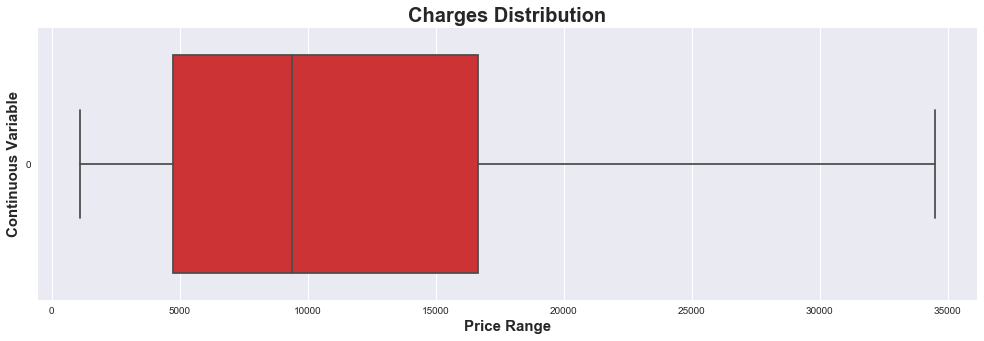

In [21]:
# Define a function
def rmoutlier(col):
    sorted(col)
    quant1, quant2 = col.quantile([0.25, 0.75])
    IQR = quant2 - quant1
    lowerRange = quant1 - (1.5 * IQR)
    upperRange = quant2 + (1.5 * IQR)
    return lowerRange, upperRange

# Use the function
lowScore, highScore = rmoutlier(claims['charges'])
df1 = claims
# Where 
df1['charges'] = np.where(df1['charges'] > highScore, highScore, df1['charges'])
df1['charges'] = np.where(df1['charges'] < lowScore, lowScore, df1['charges'])

# Box plot
# Outlier Analysis
plt.figure(figsize = [15,5])
sns.boxplot(data=df1['charges'], orient="h", palette="Set1", color="red")
plt.title("Charges Distribution", fontsize = 20, fontweight = 'bold')
plt.xlabel("Price Range", fontsize = 15, fontweight= 'bold')
plt.ylabel("Continuous Variable", fontsize = 15, fontweight= 'bold')
plt.show()

### $Observation$
- We see that we no longer have outliers in the charges.

---
---
# <center>4. Feature Engineering</center>
#### What is it?
This is the process of extracting features that can help improve the Machine Learning algorithms.


> ## 4.1 Label Encoding for non-numerical columns
Let us change entries that are non-numerical in our dataset

In [77]:
# Label Encoding for Sex and Smoker columns
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encode
le = LabelEncoder()

# Lvabel encoding for sex: 0 for females and 1 --> Males
claims['sex'] = le.fit_transform(claims['sex'])

# Label encoding for smoker: 0 for Smoker; 1 for non-smoker
claims['smoker'] = le.fit_transform(claims['smoker'])

# Label encoding for Region
claims['region'] = le.fit_transform(claims['region'])

# check if the changes took effect
claims.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


> ## 4.2 Feature Selection
This is the process of selecting features which are most relevant in predicting the output variable.
- <font color='red'>$\implies$</font> It helps reduce data dimensionality and 
- <font color='red'>$\implies$</font> Ensures that models' accuracy can be trusted when those features are out. Learn more [here](https://en.wikipedia.org/wiki/Feature_selection).
After exploratory data analysis, we saw that some features do not affect insurance charges that much. We saw that 
* * `Sex` and 
* * `Region` 
have an insignificant impact on the charges.

> Such features can be dropped. But before we do, let us create a radar chart that shall prove to us that thos features do no affect charges.
>> ### 4.2.1 Radar Chart
- A radar chart is a graphical method of displaying multivariate data in the form of a two-dimensional chart of three or more quantitative variables represented on axes starting from the same point (Source: [Wikipedia](https://en.wikipedia.org/wiki/Radar_chart))

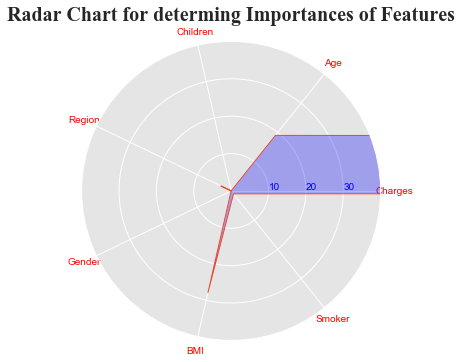

In [148]:
data = claims
from math import pi

# Set data
df = pd.DataFrame({'group': [i for i in range(0, 1338)],
                   'Charges': data['charges'],
                   'Age': data['age'],
                   'Children': data['children'],
                   'Region':data['region'],
                   'Gender':data['sex'],
                   'BMI': data['bmi'],
                   'Smoker':data['smoker']})
 
# number of variable
categories = list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='red', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="blue", size=10)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
plt.title('Radar Chart for determing Importances of Features', fontsize = 20, fontname="Times New Roman") 

# Fill area
ax.fill(angles, values, 'b', alpha=.3)

### $Analysis$
- There we have it, just like we say
        - Region
        - Children and
        - Sex 
features do not have a significant impact on charges and can be dropped accordingly.

<h1><center>5. Data Modeling</center></h1>
<h2> 5.1 Split the data into features and label</h2>

- Here we split our original dataset into two: features (that will be used in the model) and label (our target variable).

In [163]:
# splitting the dependent and independent variables
#X = claim.drop('charges', axis = 1)
insure_data = claims[['age', 'bmi', 'children', 'sex', 'smoker', 'charges']]

X = insure_data.drop(['charges'], axis = 1)
y = insure_data.charges

In [164]:
# check X
X.head()

,age,bmi,children,sex,smoker
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [165]:
# check y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

<h2> 5.2 Train-Test Split: split the data into Training and Testing Sets</h2>

In [166]:
# Split Dataset into training and testing sets
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 30)

<h3>5.2.1 Check if shapes of split data match: for train sets and test sets</h3>

In [167]:
#print('-'*48)
print('X_train has', X_train.shape[0], 'rows, y_train also has', y_train.shape[0], 'rows')
print('-'*49)
print('X_test has', X_test.shape[0], 'rows, y_test also has', y_test.shape[0], 'rows')
print('-'*49)

X_train has 1070 rows, y_train also has 1070 rows
-------------------------------------------------
X_test has 268 rows, y_test also has 268 rows
-------------------------------------------------


#### Standard Scailing. 

In [168]:
# Import StandardScaler and rename it SS
from sklearn.preprocessing import StandardScaler as SS

# Feeding independent sets into the standardscaler 
X_train = SS().fit_transform(X_train)
X_test = SS().fit_transform(X_test)

<h1><center>6. Machine Learning Models Implementation</center></h1>
<h2>6.1 Linear Regression Model</h2>

> ### a) Train the Linear Regression Model 
> - Assign `LinearRegresson` to the variable **"lin_reg-mod"**
   > - Then we fit the ***$X$_$train$*** and ***$y$_$train$*** data to the model using `lin_reg_mod.fit()` function.

In [169]:
# Create a linear regressor
lin_reg_mod = LinearRegression()

# Train the model using the X_train  and y_train sets
lin_reg_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> ### b) Model Prediction on Test dataset
    > - Here we predict the results of the test set 
    > - We use `lin_reg_mod.predict()` function and assign it to the variable "$lin$_$reg$_$y$_$test$_$pred$".

In [170]:
# Model prediction on test data
lin_reg_y_test_pred = lin_reg_mod.predict(X_test)

> ### c) Linear Regression Model Evaluation

In [171]:
# Evaluation Metrics
# RSquare
from sklearn.metrics import r2_score

# Print RSquare Score for test data
print("Test data R-squared score for Linear Regression Model is {}".format(r2_score(y_test, lin_reg_y_test_pred)))

Test data R-squared score for Linear Regression Model is 0.7549043319540902


<h2>6.2 Decision Tree Regressor</h2>

> ### a). Training the Decision Tree Regression Model
   > - Assign `DecisionTreeRegressor` to the variable **"dt_regressor"**
   > - Then we fit the ***$X$_$train$*** and ***$y$_$train$*** data to the model using `dt_regressor.fit()` function.

In [172]:
from sklearn.tree import DecisionTreeRegressor
# Assign DecisionTreeRegressor to the variable "dt_regressor"
dt_regressor = DecisionTreeRegressor(random_state=0)
# Fit the training data to the model
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

>###  b). Model Prediction: Predicting the Results
    > - Here we predict the results of the test set with which the model trained on the training set values; 
        > - We use `dt_regressor.predict()` function and assign it to the variable "***dtr_y_test_pred***".

In [173]:
# Predict the results
dt_y_test_pred = dt_regressor.predict(X_test)

> ### c). Model Evaluation

In [174]:
# Evaluate the Model
dt_regressor.score(X_test, y_test)

# Evaluate the model
print("Test dataset df_regressor score for Decision Tree Regression Model is {}".format(dt_regressor.score(X_test, y_test)))

Test dataset df_regressor score for Decision Tree Regression Model is 0.7460742128941171


<h2>6.3 Random Forest Regressor</h2>

>### a). Training the Decision Tree Regression Model on the training dataset
    > - Assign `RandomForestRegressor` to the variable **"rf_regressor"**
        > - Then we fit the ***$X$_$train$*** and ***$y$_$train$*** data to the model using `rf_regressor.fit()` function.

In [205]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
# Assign the RandomForestRegressor to rf
rf_regressor = RandomForestRegressor(n_estimators = 10,
                           criterion = 'mse', 
                           random_state = 0,
                           n_jobs = -1)
# Fit the Model with training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

> ### b). Model Prediction: Predicting the Results
> - Here we predict the results of the test set with which the model trained on the training set values; 
> - We use `regressor.predict()` function and assign it to the variable "***rf_y_test_pred***".

In [208]:
# Model Prediction
rf_y_test_pred = rf_regressor.predict(X_test)

> ###  c).  Model Evaluation

In [210]:
# Evaluate the model
print("Test dataset R-squared score for Random Forest Regressor Model is {}".format(rf_regressor.score(X_test, y_test)))

Test dataset R-squared score for Random Forest Regressor Model is 0.8304144054938347


<h1><center>7. Summary Model Evalautions & Predictions</center></h1>

<h2>7.1 Summary Model Evaluations</h2>

We use $𝑅^2$ to evaluate and find the best model.

> - $𝑅^2$ : is a measure of the linear relationship between $X$ and $y$. It represents the goodness-of-fit of a regression model. Goodness of fit implies how better the regression model is fitted to the data points. The ideal value for $R^2$ is 1. The closer the value of $R^2$ to 1, the better is the model fitted.
    
> - One big limitation of $R^2$ is that its value always increases or remains the same as new variables are added to the model, without detecting the significance of this newly added variable (i.e value of $R^2$ never decreases on addition of new attributes to the model). As a result, non-significant attributes can also be added to the model with an increase in $R^2$ value; this can lead to overfitting of the model if there are large number of variables.

In [204]:
print("Linear Regression RSquared Score is {}".format(r2_score(y_test, lin_reg_y_test_pred)))
print("Decision Tree Regression   Score is {}".format(dt_regressor.score(X_test, y_test)))
print("Random Forest Regressor    Score is {}".format(rf_regressor.score(X_test, y_test)))

Linear Regression RSquared Score is 0.7549043319540902
Decision Tree Regression   Score is 0.7460742128941171
Random Forest Regressor    Score is 0.8329104025089105


<h2>7.2 Comparing Real Values $vs.$ Predicted Values</h2>
<h4>
    <li> Let's display the values of y_test as "Real Values" and lin_reg_y_test_pred as Predicted Values in a Pandas DataFrame.</li>
    </h4>

In [179]:
lr_df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': lin_reg_y_test_pred})
dt_df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': dt_y_test_pred})
rf_df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': rf_y_test_pred})

## Visualizing Models Results
### Linear Regression

Text(0, 0.5, 'Price')

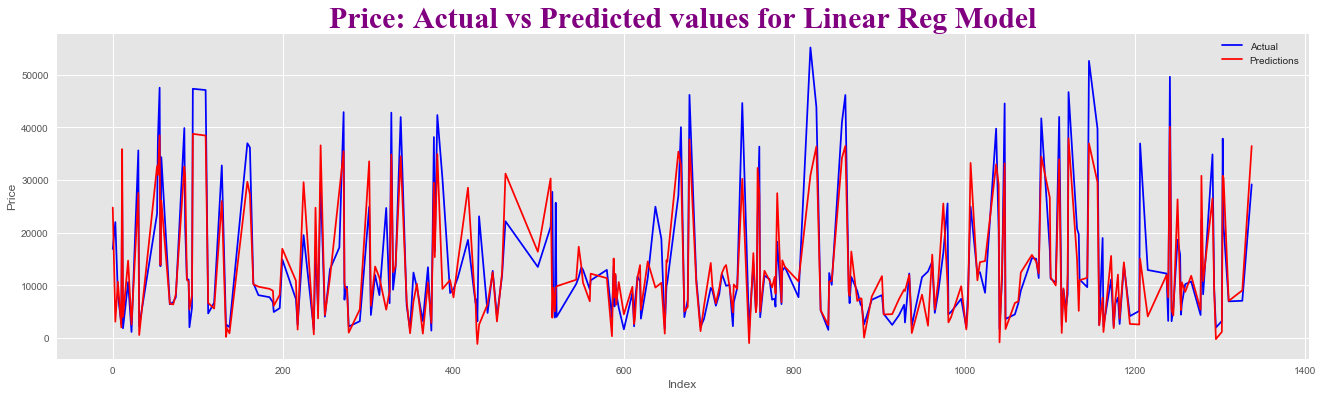

In [183]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 6))
# Linear Reg Model Predictions 
sns.lineplot(x = y_test.index, y = y_test, label = "Actual", color = "blue", ax = ax)
sns.lineplot(x = y_test.index, y = lin_reg_y_test_pred, label = "Predictions", color = "red", ax = ax)
ax.set_title("Price: Actual vs Predicted values for Linear Reg Model", fontname ='Times New Roman', size = 30, color ='purple')
ax.set_xlabel("Index")
ax.set_ylabel("Price")

### Show Real Charges vs Predicted Charges for the first 20 entries

Text(0.5, 1.0, 'Actual vs Predicted values')

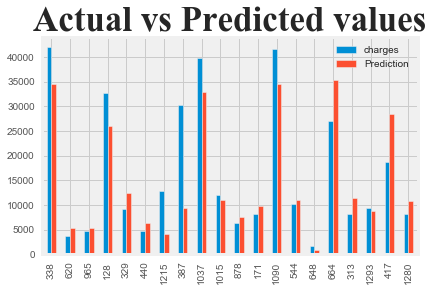

In [201]:
# Model Prediction on Test Data
LinPrediction = lin_reg_mod.predict(X_test)

# Turn future_forecast into a Dataframe
future_forecast = pd.DataFrame(LinPrediction, index = y_test.index, columns=['Prediction'])

# Bring it together with the original/real dataset
forecast_fig = pd.concat([y_test,future_forecast], axis=1)

# Graph the forecast vs real data
figsize = (30,5)
forecast_fig.head(20).plot(kind='bar')
plt.title('Actual vs Predicted values', size = 35, fontname = "Times New Roman")

### Decision Tree

Text(0, 0.5, 'Charges')

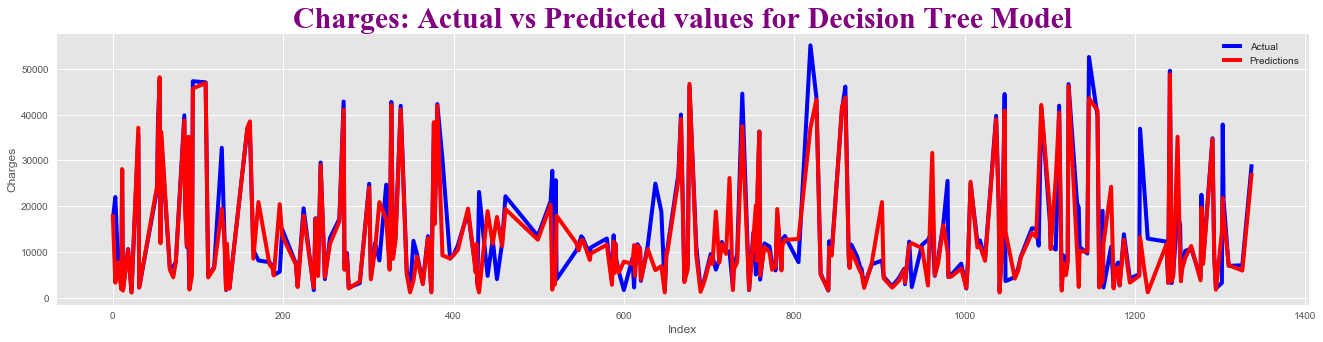

In [202]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 5))
#
sns.lineplot(x = y_test.index, y = y_test, label = "Actual", color = "blue", ax = ax)
sns.lineplot(x = y_test.index, y = dt_y_test_pred, label = "Predictions", color = "red", ax = ax)
ax.set_title("Charges: Actual vs Predicted values for Decision Tree Model", fontname ='Times New Roman', size = 30, color ='purple')
ax.set_xlabel("Index")
ax.set_ylabel("Charges")

### Show Real Charges vs Predicted Charges for the first 20 entries

Text(0.5, 1.0, 'Actual vs Predicted values')

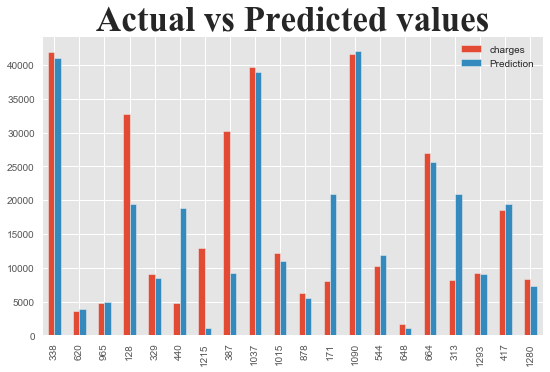

In [186]:
# Model Prediction on Test Data
DtPrediction = dt_regressor.predict(X_test)

# Turn future_forecast into a Dataframe
future_forecast = pd.DataFrame(DtPrediction, index = y_test.index, columns=['Prediction'])

# Bring it together with the original/real dataset
forecast_fig = pd.concat([y_test,future_forecast], axis=1)

# Graph the forecast vs real data
figsize = (15,5)
forecast_fig.head(20).plot(kind='bar')
plt.title('Actual vs Predicted values', size = 35, fontname = "Times New Roman")

### Random Forest Model

Text(0, 0.5, 'Price')

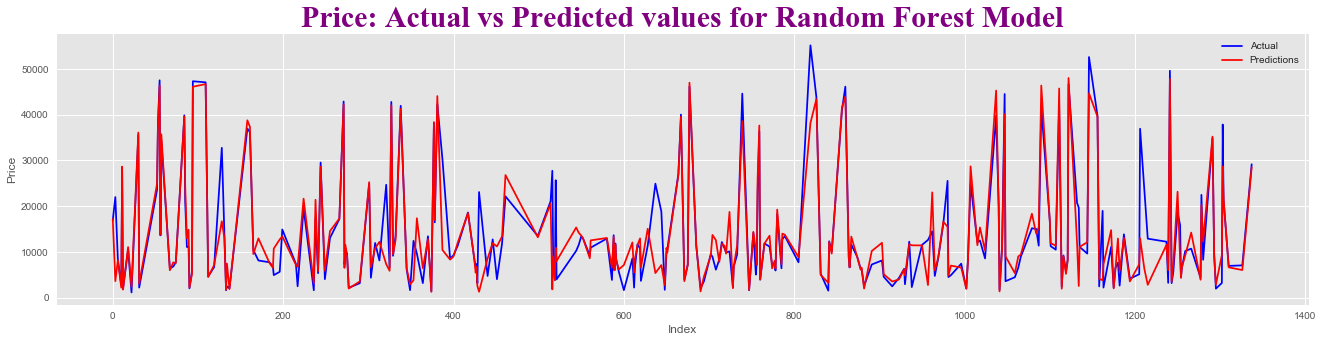

In [187]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(x = y_test.index, y = y_test, label = "Actual", color = "blue", ax = ax)
sns.lineplot(x = y_test.index, y = rf_y_test_pred, label = "Predictions", color = "red", ax = ax)
ax.set_title("Price: Actual vs Predicted values for Random Forest Model", fontname ='Times New Roman', size = 30, color ='purple')
ax.set_xlabel("Index")
ax.set_ylabel("Price")

### Show Real Charges vs Predicted Charges for the first 20 entries

Text(0.5, 1.0, 'Actual vs Predicted values')

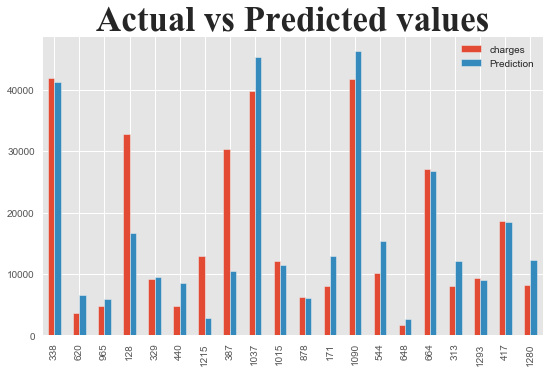

In [188]:
# Model Prediction on Test Data
RFPrediction = rf_regressor.predict(X_test)

# Turn future_forecast into a Dataframe
future_forecast = pd.DataFrame(RFPrediction, index = y_test.index, columns=['Prediction'])

# Bring it together with the original/real dataset
forecast_fig = pd.concat([y_test,future_forecast], axis=1)

# Graph the forecast vs real data
figsize = (15,5)
forecast_fig.head(20).plot(kind='bar')
plt.title('Actual vs Predicted values', size = 35, fontname = "Times New Roman")

<h1>
    <center>
        8. Conclusion
        </center>
    </h1>

<li>We see that the best model amongst the three we used is Random Forest Regressor
    </li>
<li>We also see some illustrations of actual charges $vs$ predicted charges- this is to paint a better picture so as to get a sense of the accuracy of the models, even without the scores.
    
<h3>
    Understanding Predictions better
    </h3>
    <li>
    What if you were to give me details of an individual and you want to know how much they'd be charged? 
    </li>
    
> #### Let's say you have the following details about that someone:
- Age, 
- BMI, 
- Number of children, 
- Sex (gender), 
- Smoking status

<li>Using the best model from the above - Random Forest- I should be able to give you a quote.</li>

><font color='red'> Let's assume the individual has the following details:</font> 

- $\implies$ Age: 34
- $\implies$ BMI: 30
- $\implies$ Number of Children: 5
- $\implies$ Gender: 1 (male)
- $\implies$ Smoking Status: 1 (Yes, a smoker)

The the array will be [34, 30, 5, 1, 1]

In [258]:
quote = rf_regressor.predict(np.asarray([20, 30, 5, 1, 1]).reshape(-1,5))

# Print Quote
print("Quote based on Random Forest Model is $",round(float(quote), 2))

Quote based on Random Forest Model is $ 59020.95


### $Analysis$
- We see that for this particular individual they'd be charged $59020.95 in premiums.


---
> Now you may be wondering, "how realible is this model?". Remember in our Exploratory Data Anaysis we did say that Smokers get charged more. Since the above individual is a smoker, what if you were to present me with the data of a non-smoker- would we get lower quote? Let's find out- this is to further validate our model.

> We will use same data provided but change one thing- smoking status (to No).

In [259]:
quote1 = rf_regressor.predict(np.asarray([20, 30, 5, 1, 0]).reshape(-1,5))

# Print Quote
print("Quote based on Random Forest Model is $",round(float(quote1), 2))

Quote based on Random Forest Model is $ 25775.28


### $Analysis$
- While the drop is huge, it goes to magnify the abilities of our model. Yes, we indeed see that smokers get charged more and non-smokers not so much. 


I do hope that this short offers a better insight into analysing insurance data and that it offers an overview of how we can make the most out of the simplest Machine Learning Models in the insurance industry for underwriting and many other purposes. ]
